In [1]:
%pylab inline
import glob
from collections import OrderedDict

import matplotlib.patches as patches
import pandas as pd
import proplot as plot
import seaborn as sns
from riboraptor import load_pub_theme
from riboraptor.helpers import mkdir_p
load_pub_theme()


plot.rc.fontname = "Arial"
plot.rc.large = 16
plot.rc.small = 12
plot.rc.ticklen = 10
plot.rc.tickratio = 0.5
plot.rc.linewidth = 2
plot.rc.margin = 0.2
# plot.axes.ymargin=5

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/scratch/ipykernel_23608/1472490513.py:15: ProplotWarning: rc setting 'large' was renamed to 'font.largesize' in version 0.6.
  plot.rc.large = 16
/scratch/ipykernel_23608/1472490513.py:16: ProplotWarning: rc setting 'small' was renamed to 'font.smallsize' in version 0.6.
  plot.rc.small = 12
/scratch/ipykernel_23608/1472490513.py:18: ProplotWarning: rc setting 'tick.ratio' was renamed to 'tick.widthratio' in version 0.8.
  plot.rc.tickratio = 0.5
/scratch/ipykernel_23608/1472490513.py:19: ProplotWarning: rc setting 'linewidth' was renamed to 'meta.width' in version 0.8.
  plot.rc.linewidth = 2


In [2]:
DATA_DIR = "/gpfs/commons/home/schoudhary/github/C_albicans_biofilm_2021/Feb_2021_Kadosh_C_albicans_Biofilm_Planktonic"
#/ribotricer_results

# Plot scatter pairwise

In [3]:
counts_df = pd.read_csv(
    DATA_DIR+"/ribotricer_results/region_counts/annotated_merged_counts_ribo_rna_collapsed_allele.tsv", sep="\t"
)
counts_df

,gene_id,biofilm-ribo-1,biofilm-ribo-2,biofilm-ribo-3,planktonic-ribo-1,planktonic-ribo-2,planktonic-ribo-3,biofilm-rna-1,biofilm-rna-2,biofilm-rna-3,planktonic-rna-1,planktonic-rna-2,planktonic-rna-3
0,C1_00010W,0,2,1,0,1,0,1,1,0,0,6,0
1,C1_00020C,0,1,0,0,0,6,32,0,258,15,1,8
2,C1_00030C,0,0,0,0,0,0,0,0,1,0,0,0
3,C1_00040W,0,0,0,3,5,6,8,0,54,33,1,164
4,C1_00050C,0,0,0,0,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6205,CR_10820W,84,0,0,58,0,38,116,1,992,90,277,124
6206,CR_10830C,397,408,484,192,188,280,109,1,493,117,2,257
6207,CR_10840C,35722,9280,12204,12485,9038,8877,9015,10541,48683,6304,6024,22228
6208,CR_10850C,10496,7656,6519,7490,3979,3643,3219,3381,15723,2755,2048,9332


In [4]:
tpm_df = pd.read_csv( DATA_DIR+"/ribotricer_results/region_counts/annotated_merged_tpm_ribo_rna.tsv", sep="\t").set_index("gene_id")
tpm_df

,biofilm-ribo-1,biofilm-ribo-2,biofilm-ribo-3,planktonic-ribo-1,planktonic-ribo-2,planktonic-ribo-3,biofilm-rna-1,biofilm-rna-2,biofilm-rna-3,planktonic-rna-1,planktonic-rna-2,planktonic-rna-3
gene_id,,,,,,,,,,,,
C1_00010W_A,0.000000,0.462151,0.265338,0.000000,0.328058,0.000000,0.401778,0.294821,0.000000,0.000000,2.741642,0.000000
C1_00010W_B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C1_00020C_A,0.000000,0.251266,0.000000,0.000000,0.000000,2.479321,12.669654,0.000000,24.150633,6.661067,0.496867,1.143010
C1_00020C_B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310654,0.000000,2.363679,1.024780,0.000000,0.000000
C1_00030C_A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102769,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
CR_10840C_B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029403,0.000000,0.000000,0.000000
CR_10850C_A,1506.393903,1230.687053,1203.295487,1589.395742,908.063824,963.057123,899.702790,693.419298,1033.730714,903.094980,651.000838,852.994552
CR_10850C_B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
from scipy.stats import pearsonr

plot.rc.margin = 0.1

In [6]:
def plot_scatter(tpm_df, col1, col2, ax):
    ax.scatter(
        np.log2(1 + tpm_df[col1]),
        np.log2(1 + tpm_df[col2]),
        alpha=0.5,
        color="#756bb1",
        rasterized=True,
    )
    start, end = ax.get_xlim()
    ax.set_xlim(0, end)
    ax.set_ylim(0, end)
    col1n = col1.replace("biofilm-ribo-", "Ribo Biofilm #").replace("planktonic-ribo-", "Ribo Planktonic #")
    col2n = col2.replace("biofilm-ribo-", "Ribo Biofilm #").replace("planktonic-ribo-", "Ribo Planktonic #")
    col1n = col1n.replace("biofilm-rna-", "RNA Biofilm #").replace("planktonic-rna-", "RNA Planktonic #")
    col2n = col2n.replace("biofilm-rna-", "RNA Biofilm #").replace("planktonic-rna-", "RNA Planktonic #")
    
    ax.set_xlabel("$\log_2$(1+TPM) {}".format(col1n))
    ax.set_ylabel("$\log_2$(1+TPM) {}".format(col2n))
    plot.rc.margin = 0.0

    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    # Hide the right and top spines
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")
    x = np.linspace(*ax.get_xlim())

    corr = pearsonr(np.log2(1 + tpm_df[col1]), np.log2(1 + tpm_df[col2]))

    ax.plot(
        x,
        x,
        color="black",
        linestyle="dashed",
        label="$R^2$= {}".format(np.round(corr[0], 2)),
    )
    ax.legend(frameon=False)
    ax.set_aspect("equal", "box")
    ticks = [0, 2, 4, 6, 8, 10, 12, 14]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

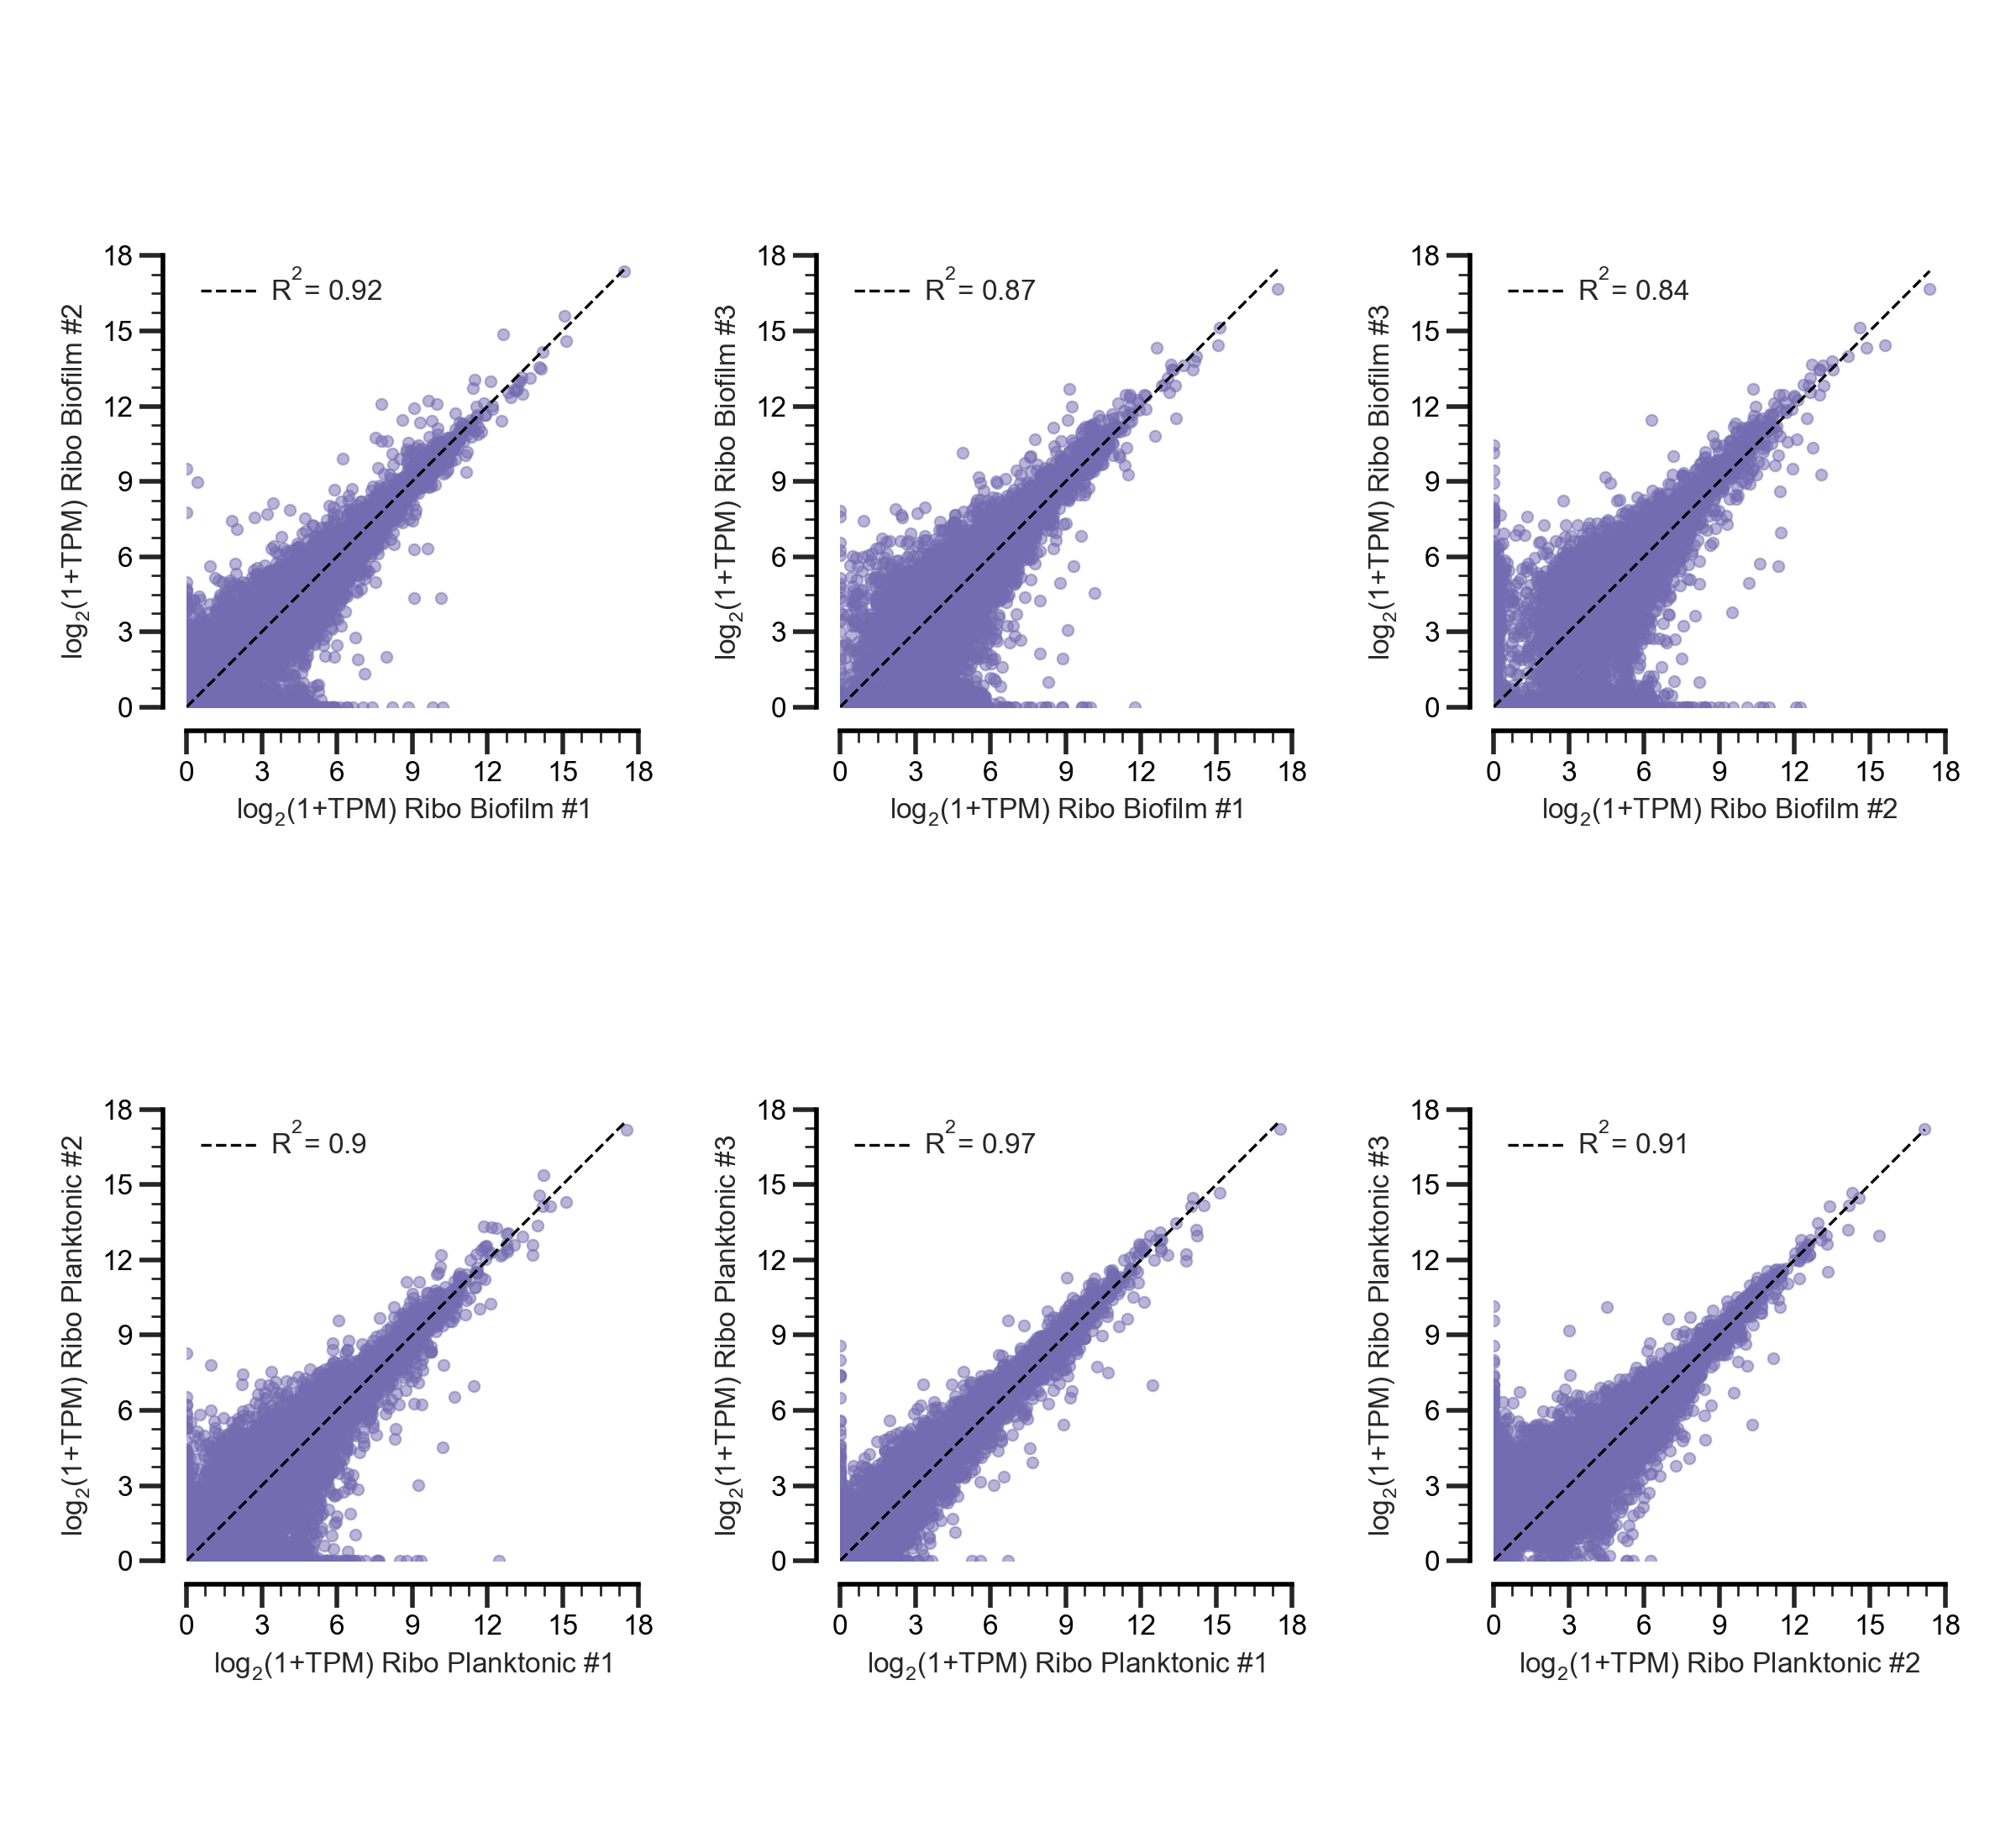

In [14]:
fig = plt.figure(figsize=(12, 11))
ax = fig.add_subplot(231)
plot_scatter(tpm_df, "biofilm-ribo-1", "biofilm-ribo-2", ax)
ticks = [0, 3, 6, 9, 12, 15, 18]
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax = fig.add_subplot(232)
plot_scatter(tpm_df, "biofilm-ribo-1", "biofilm-ribo-3", ax)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax = fig.add_subplot(233)
plot_scatter(tpm_df, "biofilm-ribo-2", "biofilm-ribo-3", ax)
ax.set_xticks(ticks)
ax.set_yticks(ticks)


ax = fig.add_subplot(234)
plot_scatter(tpm_df, "planktonic-ribo-1", "planktonic-ribo-2", ax)
ax.set_xticks(ticks)
ax.set_yticks(ticks)


ax = fig.add_subplot(235)
plot_scatter(tpm_df, "planktonic-ribo-1", "planktonic-ribo-3", ax)
ax.set_xticks(ticks)
ax.set_yticks(ticks)


ax = fig.add_subplot(236)
plot_scatter(tpm_df, "planktonic-ribo-2", "planktonic-ribo-3", ax)
ax.set_xticks(ticks)
ax.set_yticks(ticks)



fig.tight_layout()
fig.savefig("/gpfs/commons/home/schoudhary/github/C_albicans_biofilm_2021/Draft_Figures/FigureS1.pdf")

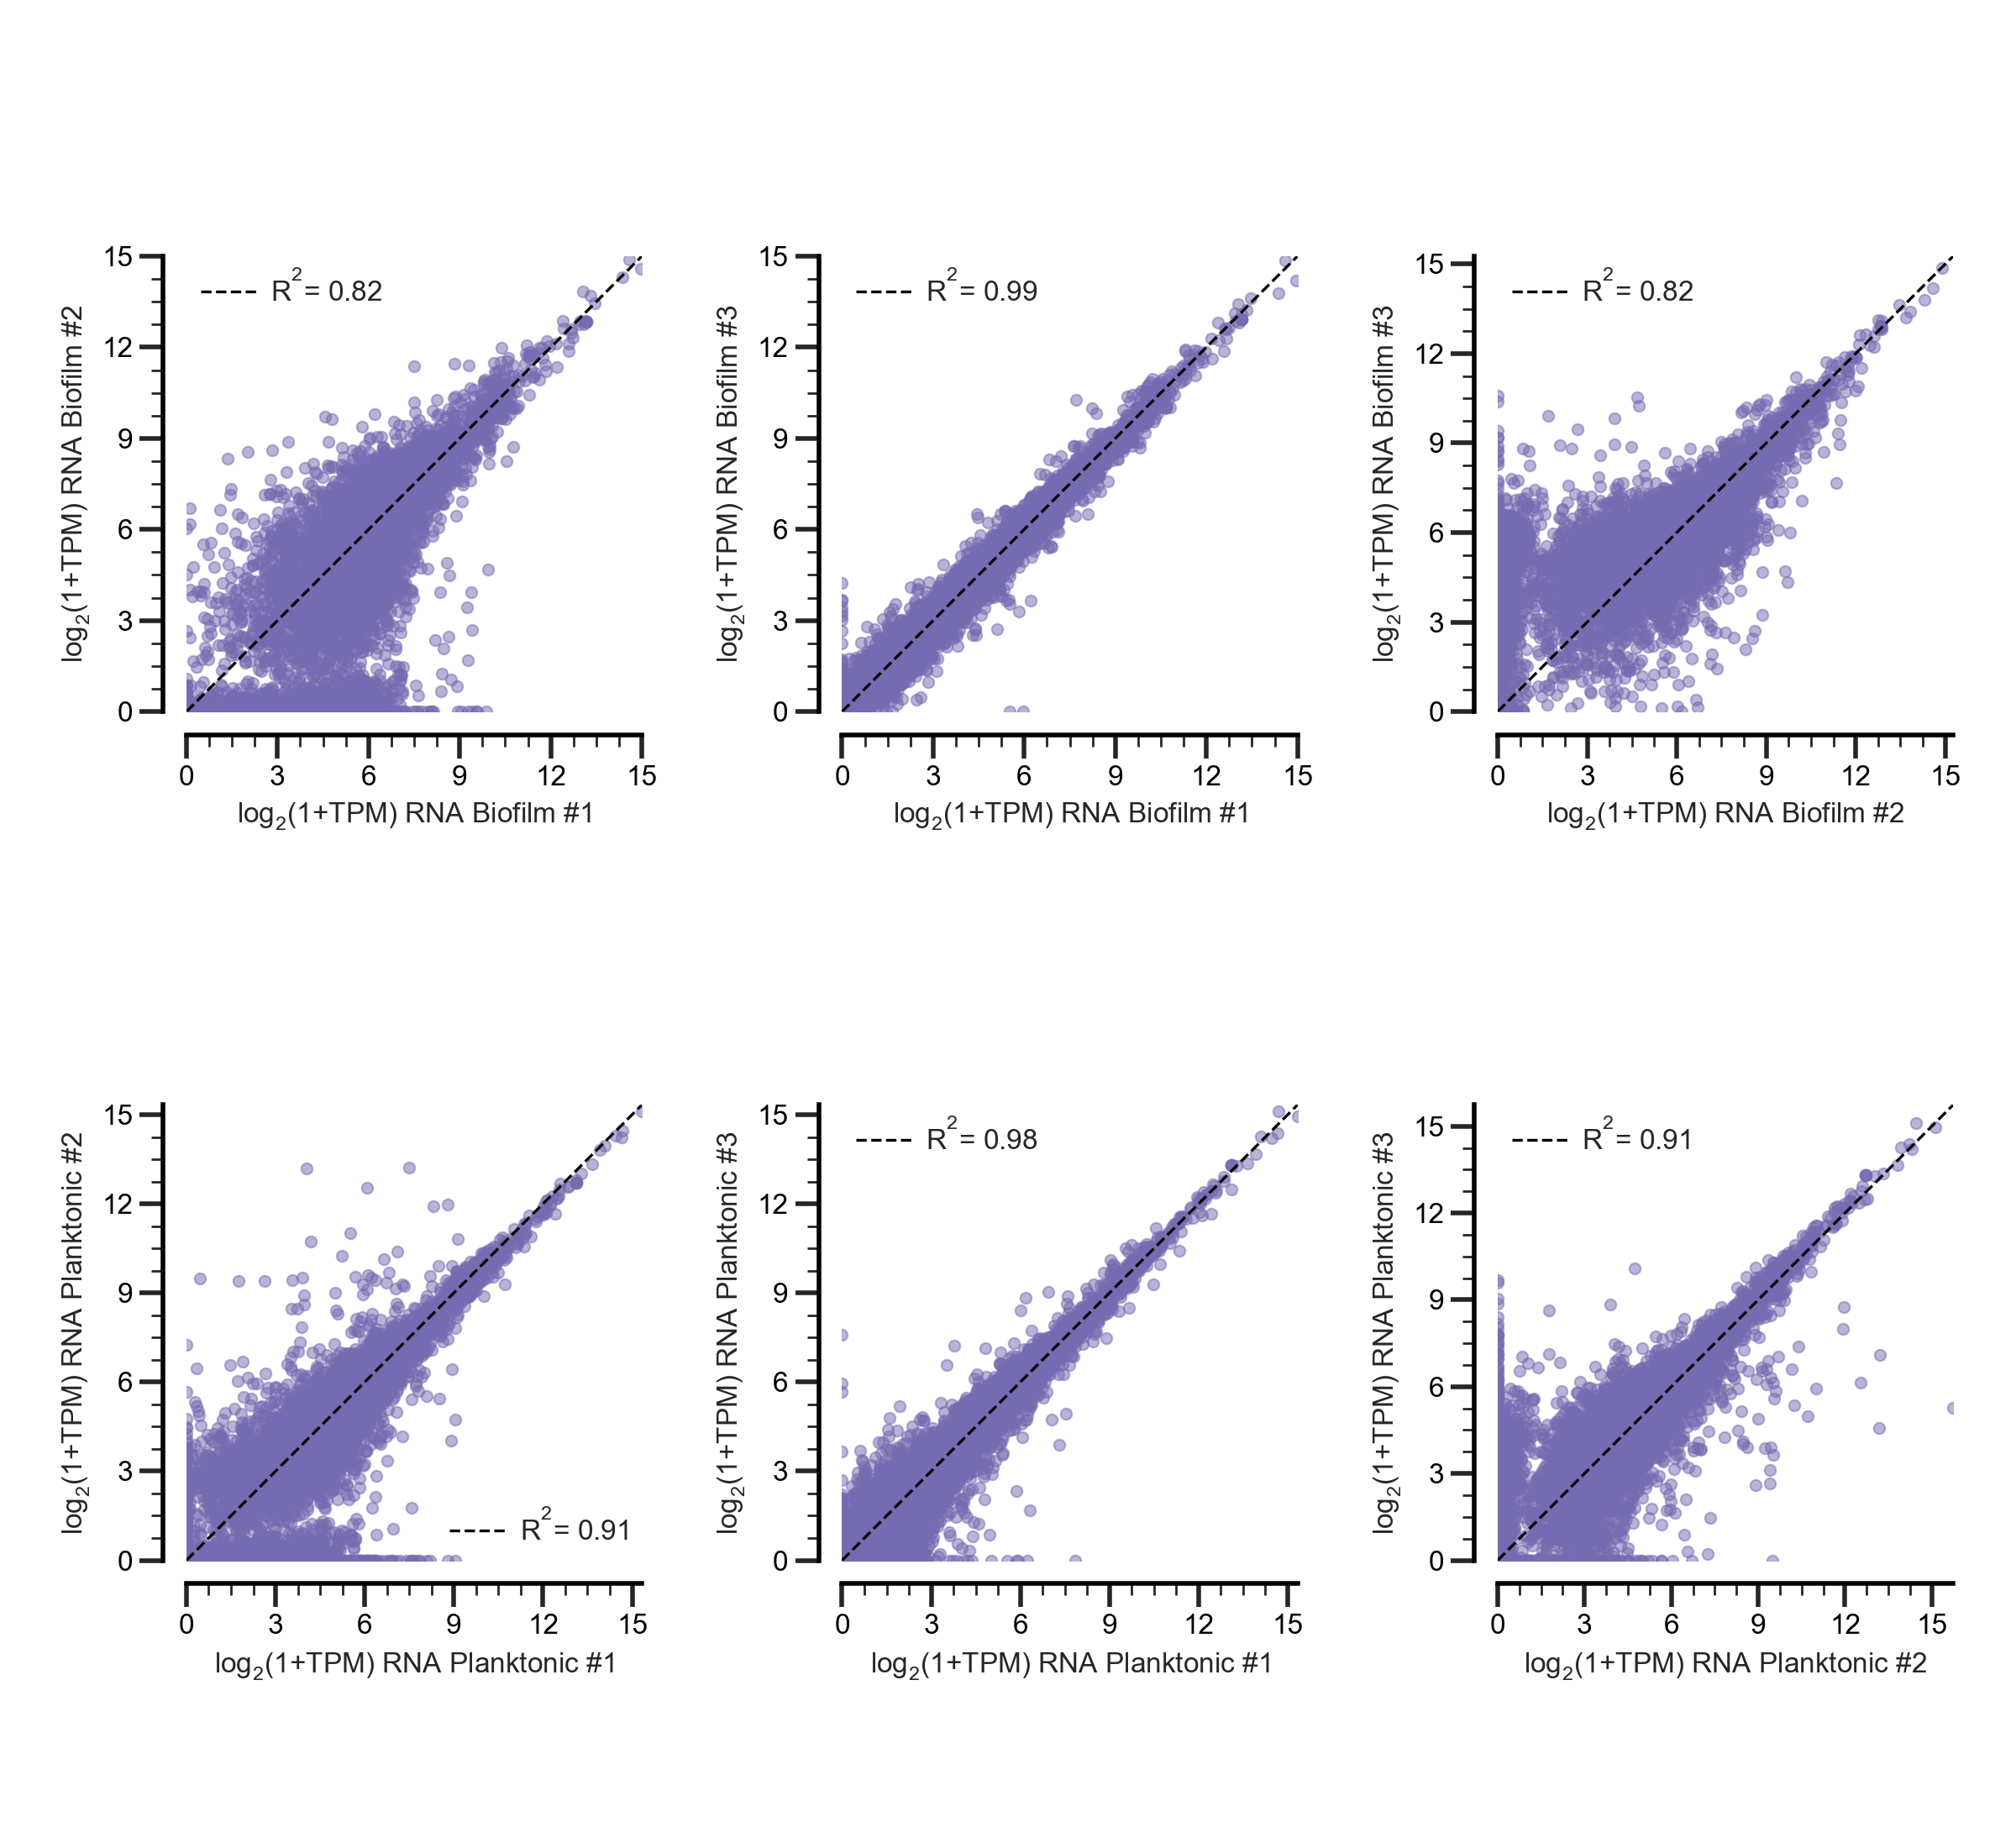

In [15]:
fig = plt.figure(figsize=(12, 11))
ax = fig.add_subplot(231)
plot_scatter(tpm_df, "biofilm-rna-1", "biofilm-rna-2", ax)
ticks = [0, 3, 6, 9, 12, 15]
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax = fig.add_subplot(232)
plot_scatter(tpm_df, "biofilm-rna-1", "biofilm-rna-3", ax)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax = fig.add_subplot(233)
plot_scatter(tpm_df, "biofilm-rna-2", "biofilm-rna-3", ax)
ax.set_xticks(ticks)
ax.set_yticks(ticks)


ax = fig.add_subplot(234)
plot_scatter(tpm_df, "planktonic-rna-1", "planktonic-rna-2", ax)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax = fig.add_subplot(235)
plot_scatter(tpm_df, "planktonic-rna-1", "planktonic-rna-3", ax)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax = fig.add_subplot(236)
plot_scatter(tpm_df, "planktonic-rna-2", "planktonic-rna-3", ax)
ax.set_xticks(ticks)
ax.set_yticks(ticks)


fig.tight_layout()
fig.savefig("/gpfs/commons/home/schoudhary/github/C_albicans_biofilm_2021/Draft_Figures/FigureS2.pdf")